In [22]:
from fipy import *
from scipy.special import erf
from fipy.tools import numerix

In [23]:
nx = 50
dx = 1.
mesh = Grid1D(nx = nx, dx = dx)
phi = CellVariable(name="Solution Vriable", mesh=mesh, value=0.0)
phiAnalytical = CellVariable(name="Analytical Solution", mesh=mesh)
D = 1
print(phi)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


### Defining t variable for analytical plot

In [27]:
timeStepDuration = 0.9 * ( dx**2/(2*D) ) #The largest stable timestep that can be taken, limit steps to 90%
steps = 100
t = timeStepDuration* steps

### Applying new constraints to phi variable

<Figure size 640x480 with 0 Axes>

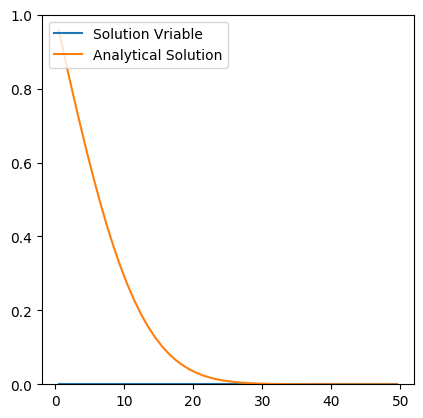

In [28]:
time = Variable()
valueRight = 0;
valueLeft = (1 + numerix.sin(time)) * 0.5
x = mesh.cellCenters[0]
phi.constrain(valueLeft, mesh.facesLeft)
phi.constrain(valueRight, mesh.facesRight)
phiAnalytical.setValue(1 - erf(x / (2 * numerix.sqrt(D * t))))  #generates analytical equation
equation_Diffusion = TransientTerm() == DiffusionTerm(coeff=D)
view = Viewer(vars=(phi,phiAnalytical), datamin=0.0, datamax=1.0)

In [29]:
dt = 0.1
while time() < 15:
    time.setValue(time() + dt)
    equation_Diffusion.solve(var = phi, dt = dt)

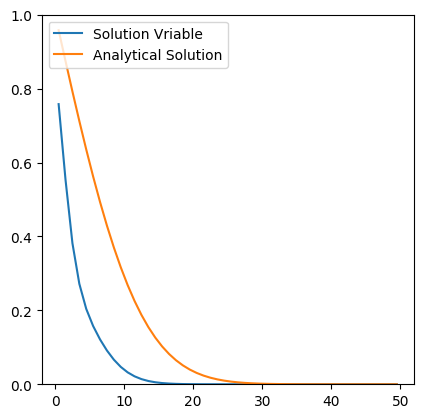

[7.57986894e-01 5.53044467e-01 3.81591627e-01 2.71731718e-01
 2.03969576e-01 1.57584636e-01 1.21366815e-01 9.13245963e-02
 6.66150429e-02 4.70626159e-02 3.22634767e-02 2.15120827e-02
 1.39754473e-02 8.85533515e-03 5.47472852e-03 3.30233678e-03
 1.94305429e-03 1.11494115e-03 6.23821537e-04 3.40335430e-04
 1.81072039e-04 9.39740550e-05 4.75923741e-05 2.35306821e-05
 1.13636668e-05 5.36319851e-06 2.47510613e-06 1.11757019e-06
 4.93983756e-07 2.13869997e-07 9.07451773e-08 3.77541191e-08
 1.54097474e-08 6.17351718e-09 2.42875367e-09 9.38745370e-10
 3.56629976e-10 1.33222716e-10 4.89560791e-11 1.77040858e-11
 6.30293687e-12 2.20990078e-12 7.63334335e-13 2.59845466e-13
 8.71994694e-14 2.88561340e-14 9.41739184e-15 3.02550505e-15
 9.35879380e-16 2.08917035e-16]


In [31]:
view.plot()
print(phi)